In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
from config import Essex_Shape_Config, Web_Scrape_Config
from clean_job_data import job_data_w_geog
from scipy import stats
import json
import ast
from keplergl import KeplerGl
map_1 = KeplerGl()

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


# Get Job Scrape Data
Job scrape data is from indeed, number of pages parameters have been restricted

In [2]:
# Print list, manually change list and change code to append data that has been blocked
gdf = job_data_w_geog()
print(gdf.shape)
gdf.head()

(36413, 18)


,search_term,job_title,wage,wage_freq,company,location,desc,FID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
0,Basildon,Warehouse Operative FTC (Fixed Term Contract) ...,10.5,hour,Amazon,Tilbury,"As part of our team, you will help us continue...",93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
1,Basildon,Dog walking,NaN,NaN,Mrs Paws,Billericay,You must have a full UK driving licence with n...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
2,Basildon,Office Administrator/PA,21000.0,year,BDM,Wickford,Be able to work alone and manage queries from ...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
3,Basildon,Warehouse Operative,30000.0,year,TW ROAD HAULAGE,NaN,Monday - Friday plus Saturdays hours to be dis...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."
4,Basildon,"Customer Assistant, 11 to 20 hours, Laindon",10.1,hour,Lidl,NaN,You’ll put in a shift as part of the team to c...,93,E07000066,Basildon,None,571548,190848,0.475055,51.5904,2.846207e+08,115919.108602,"MULTIPOLYGON (((0.55164 51.61775, 0.55184 51.6..."


# Wage

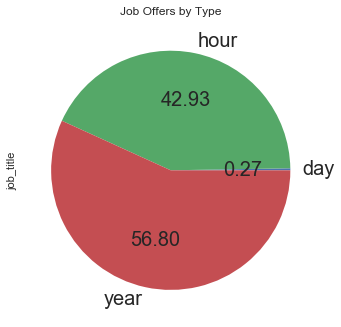

In [3]:
# Plot share of hour vs. yearly contract
matplotlib.style.use("seaborn")
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rcParams['font.size'] = 20

gdf.wage_freq.fillna("N/A")
ax = gdf.groupby('wage_freq').count().job_title.plot(kind='pie', autopct='%.2f').set_title("Job Offers by Type")
ax.figure.savefig('output/file.png', transparent=True)

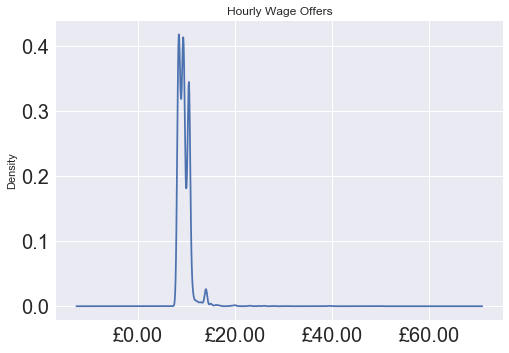

In [4]:
# Average Wage Freq
gdf_hour = gdf[gdf.wage_freq.eq("hour")]
ax = gdf_hour.wage.plot.kde()
ax.set_title("Hourly Wage Offers")
#add pound formatting
formatter = matplotlib.ticker.FormatStrFormatter('£%1.2f')
ax.xaxis.set_major_formatter(formatter)
ax.figure.savefig('output/file.png', transparent=True)

In [5]:
# gdf_hour.loc[(gdf_hour['wage'] ==50)]
stats.describe(gdf_hour.wage)

DescribeResult(nobs=9170, minmax=(8.21, 50.0), mean=9.571066521264996, variance=2.632051736222274, skewness=7.4350883276918704, kurtosis=114.72662981519574)

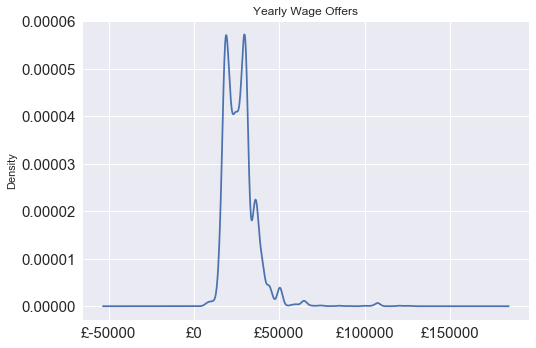

In [6]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams['font.size'] = 20

gdf_year = gdf[gdf.wage_freq.eq("year")]
ax = gdf_year.wage.plot.kde()
ax.set_title("Yearly Wage Offers")
#add pound formatting
formatter = matplotlib.ticker.FormatStrFormatter('£%1.0f')
ax.xaxis.set_major_formatter(formatter)

ax.figure.savefig('output/file.png', transparent=True)


In [7]:
gdf_year.loc[(gdf_year['wage'] ==6080.0)]
# stats.describe(gdf_year.wage)

,search_term,job_title,wage,wage_freq,company,location,desc,FID,LAD19CD,LAD19NM,LAD19NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry
4451,Braintree,Part Time Minibus Driver,6080.0,year,Felsted School,NaN,Due to the size and weight of the Schools’ min...,94,E07000067,Braintree,None,577253,227335,0.575911,51.9163,1.607073e+09,273423.537132,"POLYGON ((0.78147 51.96651, 0.78179 51.96635, ..."


# Employer

In [8]:
unique_jobs_df = gdf[['job_title','wage', "wage_freq", "company", "location", "desc"]]
unique_jobs_df.drop_duplicates(keep="first", inplace=True)
gdf.shape

/Users/ysohoye/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(36413, 18)

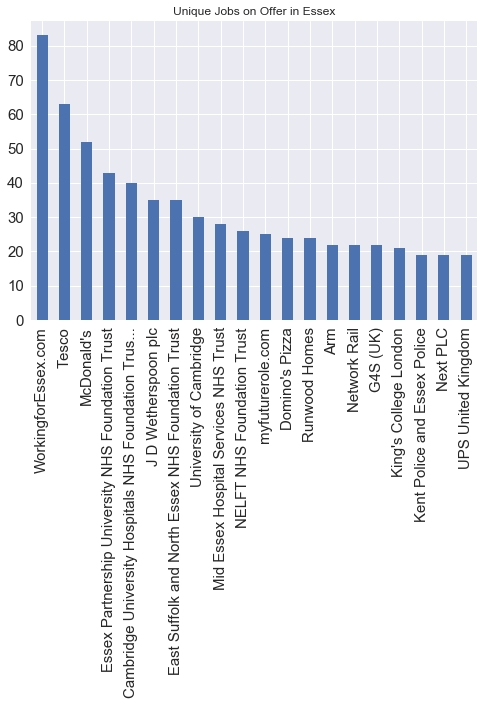

In [9]:

comp_freq = unique_jobs_df.company.value_counts()
tip_comp_freq = comp_freq.nlargest(20)
ax = tip_comp_freq.plot.bar()
ax.set_title("Unique Jobs on Offer in Essex")

ax.figure.savefig('file.png', transparent=True, bbox_inches = "tight")

## Kepler

In [10]:
# Clean geodata for importing to kepler
shape_gdf = gpd.read_file(Essex_Shape_Config.LAU_SHP_FILE)
shape_gdf.replace({'LAD19NM': {"Epping Forest": "Epping"}}, inplace = True) #epping is shortened in scraping

In [11]:
# Mean hourly wage df
mean_df_hour = gdf_hour.groupby('search_term').mean()
mean_df_hour = mean_df_hour.reset_index()
mean_df_hour_merge = pd.merge(mean_df_hour,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
mean_df_hour_merge = gpd.GeoDataFrame(mean_df_hour_merge)
mean_df_hour_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)
map_1.add_data(data=mean_df_hour_merge, name='Jobs_Hour_Average')

In [12]:
# Mean yearly wage df
mean_df_year = gdf_year.groupby('search_term').mean()
mean_df_year = mean_df_year.reset_index()
mean_df_year_merge = pd.merge(mean_df_year,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
mean_df_year_merge = gpd.GeoDataFrame(mean_df_year_merge)
mean_df_year_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)
map_1.add_data(data=mean_df_year_merge, name='Jobs_Year_Average')

In [13]:
# Job offer count/ freq by region
freq_df = gdf.groupby('search_term').count()
freq_df = freq_df.reset_index()
freq_df_merge = pd.merge(freq_df,shape_gdf, left_on="search_term", right_on='LAD19NM', how="left")
freq_df_merge = gpd.GeoDataFrame(freq_df_merge)
freq_df_merge.rename(index=str, columns={"geometry_y": "geometry"}, inplace =True)
map_1.add_data(data=freq_df_merge, name='Jobs_Freq_count')

# House Price Data

In [14]:
def change_to_dict(x:str)-> dict:
    try:
        return ast.literal_eval(x)
    except:
        return {}

df = pd.read_csv("web_data/zoopla_dump_rent.csv")
df.rental_prices = df.rental_prices.apply(change_to_dict) # Change string representation of dict to dict
df = pd.concat([df.drop(['rental_prices'], axis=1), df['rental_prices'].apply(pd.Series)], axis=1) # append to original
df.columns

Index(['Unnamed: 0', 'country_code', 'num_floors', 'image_150_113_url',
       'listing_status', 'num_bedrooms', 'location_is_approximate',
       'image_50_38_url', 'latitude', 'furnished_state', 'agent_address',
       'category', 'property_type', 'longitude', 'thumbnail_url',
       'description', 'post_town', 'details_url', 'outcode',
       'image_645_430_url', 'county', 'price', 'available_from_display',
       'listing_id', 'image_caption', 'image_80_60_url', 'status',
       'agent_name', 'num_recepts', 'country', 'first_published_date',
       'displayable_address', 'street_name', 'num_bathrooms', 'agent_logo',
       'agent_phone', 'image_354_255_url', 'image_url', 'last_published_date',
       'letting_fees', 'price_modifier', 'bills_included', 'floor_area',
       'pets_allowed', 'shared_occupancy', 'per_week', 'accurate',
       'per_month'],
      dtype='object')

In [15]:
keep_cols = ['listing_status', 'num_bedrooms', "post_town","per_week", "per_month","latitude", "longitude"]
clean_df = df[keep_cols]
clean_df

,listing_status,num_bedrooms,post_town,per_week,per_month,latitude,longitude
0,rent,5,London,3462,15000,51.643158,0.011005
1,rent,9,Chigwell,2308,10000,51.635094,0.085635
2,rent,9,Chigwell,2308,10000,51.635094,0.085635
3,rent,7,Loughton,2308,10000,51.645710,0.060422
4,rent,7,Loughton,2307,9995,51.645710,0.060422
...,...,...,...,...,...,...,...
3895,rent,6,Colchester,600,2600,51.887930,0.929145
3896,rent,7,Ilford,600,2599,51.562920,0.061006
3897,rent,4,Bishop's Stortford,600,2600,51.863377,0.277189
3898,rent,7,Ilford,600,2599,51.562920,0.061006


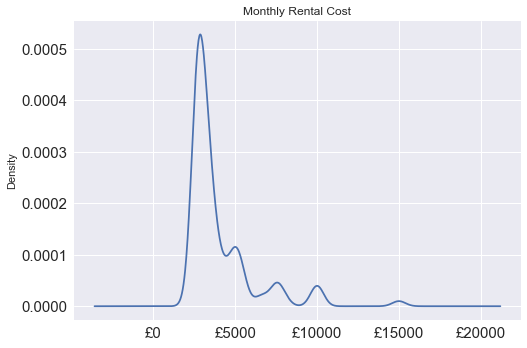

In [16]:
ax = clean_df.per_month.plot.kde()
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

#add pound formatting
formatter = matplotlib.ticker.FormatStrFormatter('£%1.0f')
ax.xaxis.set_major_formatter(formatter)
ax.set_title("Monthly Rental Cost")
ax.figure.savefig('output/file.png', transparent=True)

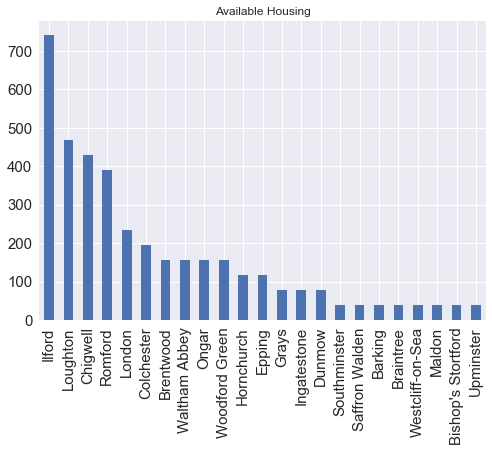

In [21]:
ax = df.post_town.value_counts().plot.bar()
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


#add pound formatting
ax.set_title("Available Housing")
ax.figure.savefig('output/file.png', transparent=True, bbox_inches = "tight")

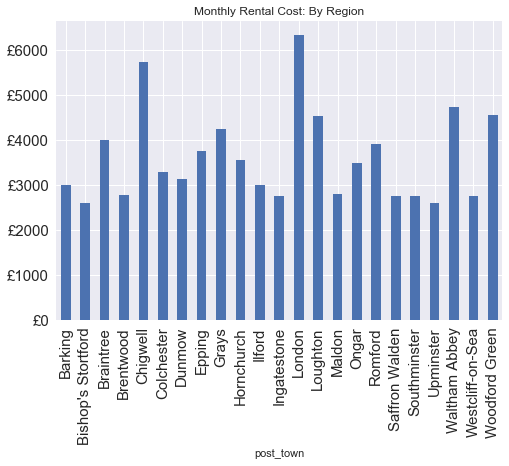

In [18]:
ax = df.groupby('post_town').mean().per_month.plot.bar()
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


formatter = matplotlib.ticker.FormatStrFormatter('£%1.0f')
ax.yaxis.set_major_formatter(formatter)

ax.set_title("Monthly Rental Cost: By Region")
ax.figure.savefig('output/file.png', transparent=True, bbox_inches = "tight")

In [19]:
house_gdf = gpd.GeoDataFrame(clean_df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
map_1.add_data(data=house_gdf, name='Rental Properties')


In [20]:
from datetime import datetime, date
date ="{:%Y_%m_%d}".format(datetime.now())

# map_1
map_1.save_to_html(file_name=f'output/esx_job_{date}.html')

Map saved to output/esx_job_2020_03_06.html!
